# Sistemas conservativos

## 1. ¿Qué es un sistema conservativo? 

Considera una partícula de masa $m$ moviéndose en el eje $x$ bajo una fuerza **autónoma** $F(x)$ (independiente de $t$ y de $\dot x$). La ecuación de movimiento es
$$
m\ddot x = F(x).
$$
Si $F(x)$ proviene de un **potencial** $V(x)$, es decir $F(x)=-\dfrac{dV}{dx}$, entonces
$$
m\ddot x + \frac{dV}{dx} = 0.
$$
Multiplicando por $\dot x$ y usando regla de la cadena,
$$
m\ddot x\,\dot x + \frac{dV}{dx}\,\dot x \;=\; \frac{d}{dt}\!\left(\frac{1}{2}m\dot x^{\,2}\right) + \frac{d}{dt}V(x)
\;=\; \frac{d}{dt}\!\left(\tfrac12 m\dot x^{\,2} + V(x)\right) \;=\; 0.
$$
Por tanto, a lo largo de soluciones, la **energía total**
$$
E(x,\dot x) \;=\; \tfrac12 m\,\dot x^{\,2} + V(x)
$$
permanece **constante en el tiempo**. A esto se le llama *primer integral* o *cantidad conservada*. 

**Consecuencia cualitativa:** en sistemas conservativos **no puede haber puntos fijos atractores** (ni espirales estables), pues la energía sería estrictamente decreciente hacia el atractor. Los retratos de fase muestran **centros** en mínimos locales de $E$ y, con frecuencia, **órbitas homoclínicas** delimitando separatrices.


## 2. El potencial de doble pozo

Trabajaremos con
$$
V(x) \;=\; -\frac{1}{2}x^2 + \frac{1}{4}x^4,
$$
cuyo gradiente es $V'(x)=-x+x^3$ y por tanto el sistema equivalente de primer orden (tomando $m=1$) es
$$
\dot x = y, 
\qquad
\dot y = -V'(x) = x - x^3.
$$
Los puntos de equilibrio cumplen $y=0$ y $x - x^3 = x(1-x^2)=0$, es decir, $(x^*,y^*)\in\{(0,0),\,(\pm1,0)\}$. Aquí $(0,0)$ es **silla** y $(\pm1,0)$ son **centros** (neutrales).

A continuación, graficamos el potencial y la superficie de energía.

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

plt.ioff()  # evita display implícito


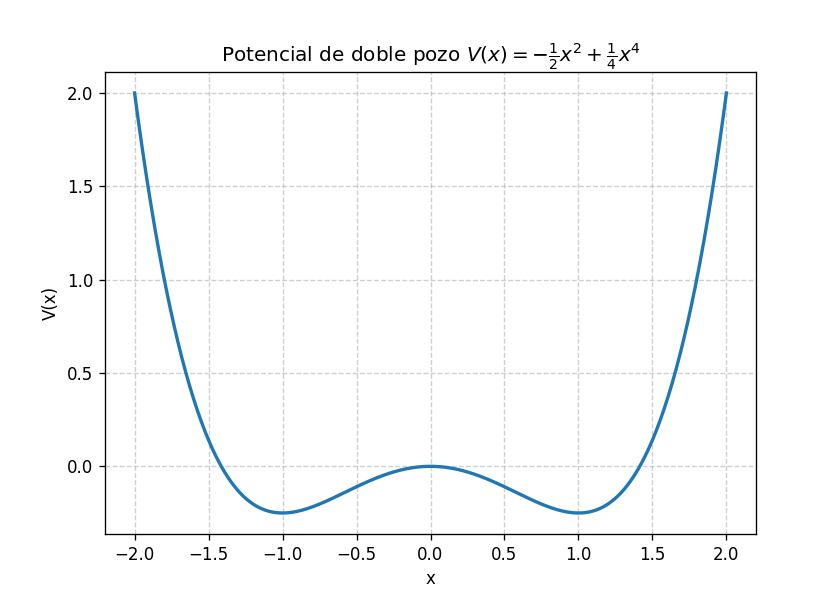

In [ ]:

x = np.linspace(-2., 2., 600)
y = -0.5*x**2 + 0.25*x**4

fig, ax = plt.subplots(figsize=(7,5), dpi=120)
ax.plot(x, y, color="C0", linewidth=2)

ax.set_title(r"Potencial de doble pozo $V(x) = -\frac{1}{2}x^2 + \frac{1}{4}x^4$")
ax.set_xlabel("x")
ax.set_ylabel("V(x)")
ax.grid(True, linestyle="--", alpha=0.6)

# Ocultar header y footer del widget interactivo
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

plt.show()

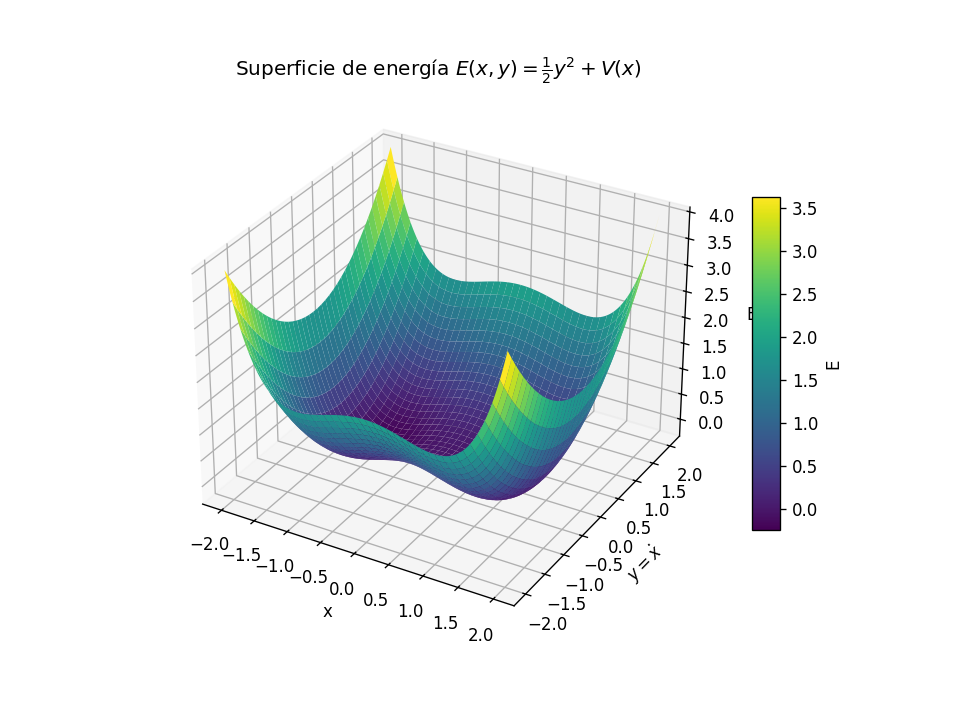

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa el toolkit 3D

def V(x):
    return -0.5*x**2 + 0.25*x**4

# Malla en (x,y)
x = np.linspace(-2.0, 2.0, 201)
y = np.linspace(-2.0, 2.0, 201)
X, Y = np.meshgrid(x, y)

E = 0.5*Y**2 + V(X)  # Energía total

# Crear figura 3D
fig = plt.figure(figsize=(8,6), dpi=120)
ax = fig.add_subplot(111, projection="3d")

# Superficie
surf = ax.plot_surface(X, Y, E, cmap="viridis", edgecolor="none")

# Barra de color
fig.colorbar(surf, shrink=0.6, aspect=12, label="E")

# Etiquetas
ax.set_title(r"Superficie de energía $E(x,y)=\frac{1}{2} y^2 + V(x)$")
ax.set_xlabel("x")
ax.set_ylabel(r"$y = \dot x$")
ax.set_zlabel("E")

fig.canvas.header_visible = False
fig.canvas.footer_visible = False

plt.show()


In [7]:
# (Plotly) Superficie de energía E(x,y) = 1/2 y^2 + V(x)
import numpy as np
import plotly.graph_objects as go

def V(x):
    return -0.5*x**2 + 0.25*x**4

x = np.linspace(-2.0, 2.0, 201)
y = np.linspace(-2.0, 2.0, 201)
X, Y = np.meshgrid(x, y)
E = 0.5*Y**2 + V(X)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=E, showscale=True)])
fig.update_layout(
    title="Superficie de energía  E(x,y)=1/2 y^2 + V(x)",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y = x'",
        zaxis_title="E"
    ),
    template="plotly_white"
)
fig.show()


## 3. Retrato de fases: streamplot y contornos de energía

Ahora dibujamos el **campo vectorial** $(\dot x,\dot y)=(y,\,x-x^3)$ con `streamplot`, y sobre él contornos de energía $E(x,y)=\tfrac12 y^2+V(x)$.

- Las **órbitas cerradas** alrededor de $(\pm1,0)$ corresponden a movimientos oscilatorios en cada pozo (*centros*).
- La **órbita homoclínica** que pasa por el punto de silla $(0,0)$ delimita las separatrices entre comportamientos cualitativamente distintos.

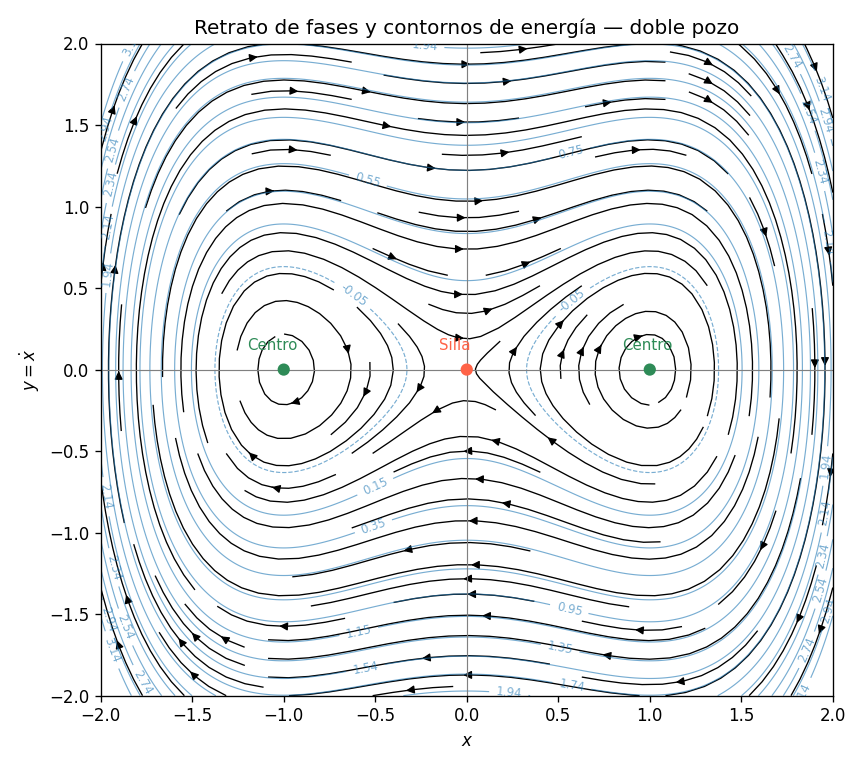

In [57]:
# (Matplotlib) Streamplot del campo y contornos de la energía
import numpy as np
import matplotlib.pyplot as plt

def V(x):
    return -0.5*x**2 + 0.25*x**4

def dVdx(x):
    return -x + x**3

# Malla del plano de fases
x = np.linspace(-2.0, 2.0, 401)
y = np.linspace(-2.0, 2.0, 401)
X, Y = np.meshgrid(x, y)

U = Y                     # dx/dt = y
W = -dVdx(X)              # dy/dt = -V'(x) = x - x^3
E = 0.5*Y**2 + V(X)       # Energía total

plt.figure(figsize=(7.2, 6.4), dpi=120)

# Streamplot del campo
plt.streamplot(X, Y, U, W, density=1.2, color="k", linewidth=0.8, arrowsize=1.0)

# Contornos de energía (suaves)
levels = np.linspace(np.min(E), np.percentile(E, 99), 18)
CS = plt.contour(X, Y, E, levels=levels, colors="C0", linewidths=0.7, alpha=0.6)
plt.clabel(CS, inline=1, fontsize=7, fmt="%.2f")

# Ejes y puntos de equilibrio
plt.axhline(0, color="gray", lw=0.7); plt.axvline(0, color="gray", lw=0.7)
plt.scatter([0, -1, 1], [0, 0, 0], c=["tomato","seagreen","seagreen"], s=40, zorder=5)
plt.text(-0.15, 0.12, "Silla", color="tomato", fontsize=9)
plt.text(0.85, 0.12, "Centro", color="seagreen", fontsize=9)
plt.text(-1.2, 0.12, "Centro", color="seagreen", fontsize=9)

plt.title("Retrato de fases y contornos de energía — doble pozo")
plt.xlabel("$x$")
plt.ylabel("$y = \\dot x$")
plt.tight_layout()
plt.show()

##  Ejercicio

1. Muestra que $E(x,\dot x)=\tfrac12 \dot x^{\,2}+V(x)$ es constante para cualquier $V$ suave.
2. Clasifique los puntos críticos de $V(x)$ y relacione su tipo con la naturaleza del equilibrio en el plano fase.
3. Cambia el parámetro del potencial a $V_\alpha(x)=-\tfrac12 x^2+\tfrac{\alpha}{4}x^4$:
   - ¿Cómo cambia la altura del *bulto* central cuando varía $\alpha$?
   - Identifica el nivel de energía de la órbita homoclínica y grafícalo.
   

## 4. Péndulo simple (sin fricción)

Para un péndulo de longitud $L$ y masa $m$,
$$
\ddot\theta + \frac{g}{L}\sin\theta = 0,
$$

o como sistema:
$$
\dot\theta = \omega, \qquad \dot\omega = -\frac{g}{L}\sin\theta.
$$

La energía (tomando el potencial cero en la parte más baja) es
$$
E(\theta,\omega) = \tfrac12 mL^2\,\omega^2 + mgL\,(1-\cos\theta).
$$

- Equilibrios: $(\theta^*,\omega^*) = (k\pi,0)$ con $k\in\mathbb{Z}$.  
  Los $(2k)\pi$ corresponden a mínimos del potencial (centros), mientras que los $(2k+1)\pi$ son máximos del potencial (sillas).

**Interpretación de la energía.**  
El término $\tfrac12 mL^2\,\omega^2$ representa la **energía cinética** asociada al movimiento angular, mientras que $mgL(1-\cos\theta)$ corresponde a la **energía potencial gravitatoria** medida desde la posición más baja del péndulo. La suma de ambas es constante en ausencia de fricción.

De acuerdo al valor de $E$, se distinguen distintos tipos de movimiento:

- Si $E < 2mgL$, el péndulo oscila en un rango acotado de ángulos alrededor de $\theta=0$ (oscilaciones pequeñas o grandes, pero sin dar vueltas completas).  
- Si $E = 2mgL$, el péndulo se encuentra en el **nivel crítico de energía**: la trayectoria corresponde a la *separatriz* que pasa por el equilibrio inestable en $\theta=\pi$. En este caso, el péndulo puede alcanzar la posición vertical invertida, pero tarda un tiempo infinito en “equilibrarse” allí.  
- Si $E > 2mgL$, el péndulo tiene suficiente energía para girar completamente, realizando **rotaciones** continuas en sentido horario o antihorario.

De esta forma, el retrato de fases muestra tres regímenes claros: órbitas cerradas (oscilaciones) alrededor de $\theta=0$, la separatriz que conecta el punto de silla en $(\pi,0)$, y trayectorias abiertas correspondientes a las rotaciones cuando la energía es mayor que el valor crítico.



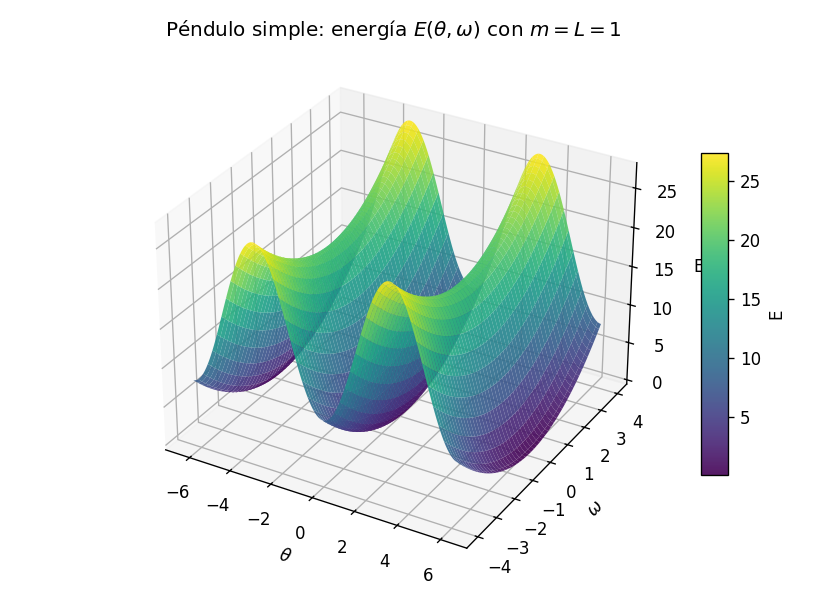

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # habilita 3D

# Parámetros del péndulo
g = 9.81
L = 1.0
m = 1.0

# Mallado
theta = np.linspace(-2*np.pi, 2*np.pi, 150)
omega = np.linspace(-4.0, 4.0, 150)
TH, OM = np.meshgrid(theta, omega)

# Energía
E = 0.5*m*(L**2)*OM**2 + m*g*L*(1 - np.cos(TH))

# Figura 3D
fig = plt.figure(figsize=(7,5), dpi=120)
ax = fig.add_subplot(111, projection="3d")

# Superficie completa
surf = ax.plot_surface(TH, OM, E, cmap="viridis", edgecolor="none", alpha=0.9)

# Barra de color
fig.colorbar(surf, shrink=0.6, aspect=12, label="E")

# Etiquetas
ax.set_title(r"Péndulo simple: energía $E(\theta,\omega)$ con $m=L=1$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$")
ax.set_zlabel("E")

plt.tight_layout()
plt.show()


In [56]:
import numpy as np
import plotly.graph_objects as go

# Parámetros y malla
g, L, m = 9.81, 1.0, 1.0
theta = np.linspace(-2*np.pi, 2*np.pi, 220)
omega = np.linspace(-4.0, 4.0, 220)
TH, OM = np.meshgrid(theta, omega)
E = 0.5*m*(L**2)*OM**2 + m*g*L*(1 - np.cos(TH))

# Rango de niveles y paso
Emin = float(E.min())
Emax = float(np.percentile(E, 97))   # evita extremos muy grandes
nlevels = 20
step = (Emax - Emin)/nlevels

fig = go.Figure(data=[go.Surface(
    x=TH, y=OM, z=E,
    showscale=True,
    #hoverinfo="skip",  # sin coordenadas
    contours=dict(
        z=dict(
            show=True,
            start=Emin, end=Emax, size=step,
            color="silver"  # líneas de nivel visibles
        )
    )
)])

fig.update_layout(
    title="Péndulo simple: energía E(θ,ω) con curvas de nivel",
    scene=dict(xaxis_title="θ", yaxis_title="ω", zaxis_title="E"),
    template="plotly_white",
    hovermode=False  # apaga hover global
)
fig.show()


In [52]:
import numpy as np
import plotly.graph_objects as go

g, L, m = 9.81, 1.0, 1.0
theta = np.linspace(-2*np.pi, 2*np.pi, 400)
omega = np.linspace(-4.0, 4.0, 400)
TH, OM = np.meshgrid(theta, omega)
E = 0.5*m*(L**2)*OM**2 + m*g*L*(1 - np.cos(TH))

Emin = float(E.min())
Emax = float(np.percentile(E, 97))
nlevels = 25
step = (Emax - Emin)/nlevels

fig = go.Figure(go.Contour(
    x=theta, y=omega, z=E,
    contours=dict(
        start=Emin, end=Emax, size=step,
        coloring="lines"   # solo líneas, sin relleno
    ),
    hoverinfo="skip"       # sin coordenadas al apuntar
))

fig.update_layout(
    title="Curvas de nivel de E(θ,ω) (sin hover)",
    xaxis_title="θ", yaxis_title="ω",
    template="plotly_white",
    hovermode=False
)
fig.show()


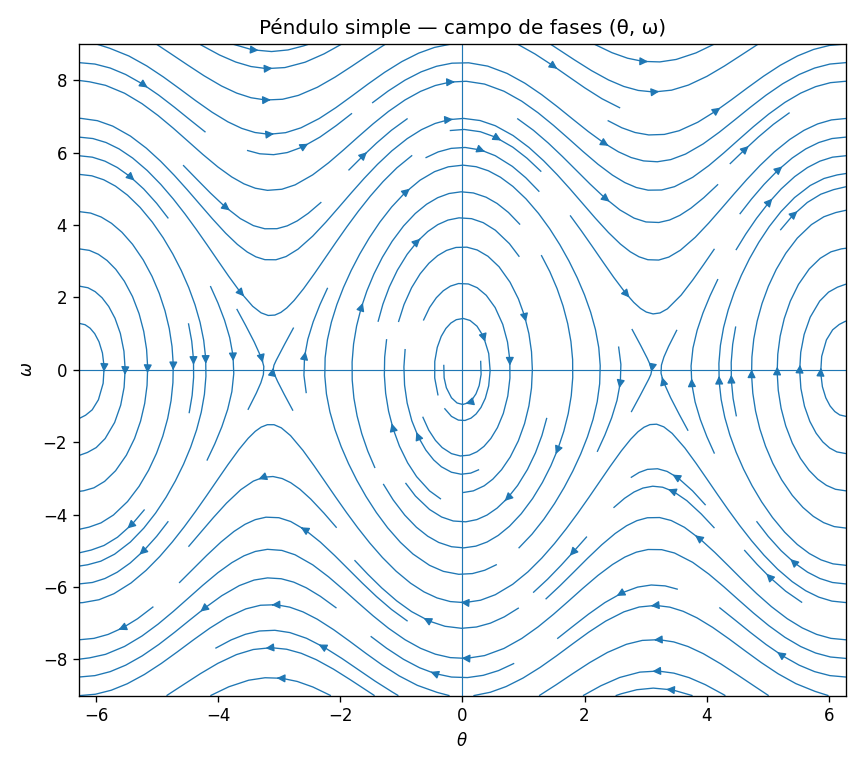

In [34]:
# Matplotlib: retrato de fases (streamplot) para el péndulo
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
L = 1.0

theta = np.linspace(-2*np.pi, 2*np.pi, 401)
omega = np.linspace(-9.0, 9.0, 401)
TH, OM = np.meshgrid(theta, omega)

U = OM                                 # dθ/dt = ω
W = -(g/L)*np.sin(TH)                  # dω/dt = -(g/L) sin θ

plt.figure(figsize=(7.2, 6.4), dpi=120)
plt.streamplot(TH, OM, U, W, density=1.2, linewidth=0.8, arrowsize=1.0)

# líneas de referencia (opcionales)
plt.axhline(0, lw=0.7); plt.axvline(0, lw=0.7)

plt.title("Péndulo simple — campo de fases (θ, ω)")
plt.xlabel("$\\theta$")
plt.ylabel("$\\omega$")
plt.tight_layout()
plt.show()

##  Ejercicio
1. Completa el código para el método RK4.

In [ ]:
%matplotlib widget

import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Play, FloatSlider, HBox, VBox, jslink, Layout
from IPython.display import display

plt.ioff()  # evita display implícito

# ---------- RK4 para el péndulo (no lineal) ----------
def integrar_pendulo_rk4(theta0: float, w0: float, L: float, g: float,
                         dt: float, n_steps: int):
    """
    Integra θ' = ω,   ω' = -(g/L) sin θ  con RK4.
    Regresa arrays θ, ω de longitud n_steps+1.
    """
    theta = np.empty(n_steps + 1, dtype=float)
    omega = np.empty(n_steps + 1, dtype=float)
    theta[0], omega[0] = theta0, w0

    #Implementa un metodo RK4
   
    return theta, omega
# -----------------------------------------------------

def pendulo_interactivo():
    # --- Controles
    L = FloatSlider(value=1.5, min=0.5, max=3.0, step=0.1, description='L (m)')
    theta0 = FloatSlider(value=0.6, min=-1.2, max=1.2, step=0.05, description='θ0 (rad)')
    w0 = FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='ω0 (rad/s)')
    g = FloatSlider(value=9.81, min=1.0, max=20.0, step=0.1, description='g (m/s²)')

    # t es un índice de pasos (0..600) y el tiempo real es t*dt, con dt=0.01 s
    dt = 0.01
    play = Play(min=0, max=600, step=1, interval=10)
    t = FloatSlider(value=0.0, min=0.0, max=600.0, step=0.01, description='t (s/100)')
    jslink((play, 'value'), (t, 'value'))

    # --- Figura persistente
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.responsive = True
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)

    # Artistas
    line, = ax.plot([0, 0], [0, -1.5], lw=2)
    bob = plt.Circle((0, -1.5), radius=0.08*1.5, fill=True, alpha=0.7)
    ax.add_patch(bob)
    ax.plot([0], [0], marker='o')              # pivote
    title = ax.set_title("")

    def fijar_limites(Lv):
        ax.set_xlim(-1.2*Lv, 1.2*Lv)
        ax.set_ylim(-1.2*Lv, 0.2*Lv)

    fijar_limites(L.value)

    # Trayectorias precomputadas (se recalculan si cambian parámetros)
    theta_path = None
    omega_path = None

    def recompute_trayectoria(_=None):
        nonlocal theta_path, omega_path
        n_steps = int(play.max)  # 600
        theta_path, omega_path = integrar_pendulo_rk4(theta0.value, w0.value, L.value, g.value,
                                                      dt=dt, n_steps=n_steps)
        fijar_limites(L.value)
        actualizar()

    def actualizar(_=None):
        # índice entero más cercano
        idx = int(min(max(0, t.value), play.max))
        th = float(theta_path[idx]) if theta_path is not None else theta0.value
        Lv = L.value

        x, y = Lv*math.sin(th), -Lv*math.cos(th)
        line.set_data([0, x], [0, y])
        bob.center = (x, y)
        bob.set_radius(0.08*Lv)

        title.set_text(f"Péndulo en t={idx*dt:.2f} s (θ={th:.2f} rad) [RK4]")
        fig.canvas.draw_idle()

    # Observadores
    for w in (L, theta0, w0, g):
        w.observe(recompute_trayectoria, names='value')
    t.observe(actualizar, names='value')

    # Layout
    controles = VBox([HBox([L, theta0]), HBox([w0, g]), HBox([play, t])],
                     layout=Layout(width='100%'))
    display(VBox([controles, fig.canvas]))

    # Primera integración + primer render
    recompute_trayectoria()

pendulo_interactivo()
